In [34]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

## Let's find the Lagrange's Equations for a Double Pendulum

<p align="center">
  <img src="double_pendulum.webp" alt="drawing" width="400" align="center"/>
</p>

Define all appropriate symbols using sympy

In [35]:
t, L1, L2, m1, m2, g = smp.symbols('t L_1 L_2 m_1 m_2 g')
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)
theta1 = theta1(t)
theta2 = theta2(t)

dth1dt = smp.diff(theta1, t)
dth2dt = smp.diff(theta2, t)
th1_dd = smp.diff(dth1dt, t)
th2_dd = smp.diff(dth2dt, t)

In [36]:
x1 = L1*smp.sin(theta1)
x2 = L1*smp.sin(theta1) + L2*smp.sin(theta2)
y1 = -L1*smp.cos(theta1)
y2 = -L1*smp.cos(theta1) - L2*smp.cos(theta2)
x1dot = smp.diff(x1, t)
x2dot = smp.diff(x2, t)
y1dot = smp.diff(y1, t)
y2dot = smp.diff(y2, t)

Find the Kinetic and Potential Energies and then the Lagrangian for the System

In [37]:
T = smp.Rational(1,2)*m1*(x1dot**2 + y1dot**2) + smp.Rational(1,2)*m2*(x2dot**2 + y2dot**2)
V = m1*g*y1 + m2*g*y2

In [38]:
L = T-V
L

L_1*g*m_1*cos(\theta_1(t)) - g*m_2*(-L_1*cos(\theta_1(t)) - L_2*cos(\theta_2(t))) + m_1*(L_1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L_1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2)/2 + m_2*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)/2

Get Lagrange's equations

$$\frac{\partial L}{\partial \theta_1} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_1}} = 0$$
$$\frac{\partial L}{\partial \theta_2} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_2}} = 0$$

In [39]:
LE1 = (smp.diff(L, theta1) - smp.diff(smp.diff(L, dth1dt), t)).simplify()
LE2 = (smp.diff(L, theta2) - smp.diff(smp.diff(L, dth2dt), t)).simplify()

In [40]:
LE1

-L_1*(L_1*m_1*Derivative(\theta_1(t), (t, 2)) + L_1*m_2*Derivative(\theta_1(t), (t, 2)) + L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + g*m_1*sin(\theta_1(t)) + g*m_2*sin(\theta_1(t)))

In [41]:
LE2

L_2*m_2*(L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L_2*Derivative(\theta_2(t), (t, 2)) - g*sin(\theta_2(t)))

Solve Lagranges equations (this assumes that `LE1` and `LE2` are both equal to zero)

In [42]:
sols = smp.solve([LE1, LE2], ([th1_dd, th2_dd]), simplify=False, rational=False)

In [43]:
sols

{Derivative(\theta_1(t), (t, 2)): L_1*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + g*m_1*sin(\theta_1(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + g*m_2*sin(\theta_1(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) - g*m_2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2),
 Derivative(\theta_2(t), (t, 2)): -L_1*m_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - L_1*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - L_2*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) -

In [44]:
sols[th1_dd]

L_1*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + g*m_1*sin(\theta_1(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) + g*m_2*sin(\theta_1(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2) - g*m_2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(-L_1*m_1 + L_1*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m_2)

In [45]:
sols[th2_dd]

-L_1*m_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - L_1*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - L_2*m_2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - g*m_1*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t))/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) + g*m_1*sin(\theta_2(t))/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) - g*m_2*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t))/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2) + g*m_2*sin(\theta_2(t))/(-L_2*m_1 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))**2 - L_2*m_2)

Now we have 

* $\frac{d^2 \theta_1}{dt^2} = ...$
* $\frac{d^2 \theta_2}{dt^2} = ...$

These are two second order ODEs! In python we can only solve systems of first order ODEs. Any system of second order ODEs can be converted as follows:

1. Define $z_1 = d\theta_1/dt$ and $z_2=d\theta_2/dt$
2. Then $dz_1/dt = d^2\theta_1/dt^2$ and $dz_2/dt = d^2\theta_2/dt^2$

Now we get a system of 4 first order ODEs (as opposed to 2 second order ones)

* $d z_1/dt = ...$
* $d\theta_1/dt = z_1$
* $d z_2/dt = ...$
* $d\theta_2/dt = z_1$

We need to convert the **symbolic** expressions above to numerical functions so we can use them in a numerical python solver. For this we use `smp.lambdify`

In [46]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,dth1dt,dth2dt), sols[th1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,dth1dt,dth2dt), sols[th2_dd])
dth1dt_f = smp.lambdify(dth1dt, dth1dt)
dth2dt_f = smp.lambdify(dth2dt, dth2dt)

Now define $\vec{S} = (\theta_1, z_1, \theta_2, z_2)$. IF we're going to use an ODE solver in python, we need to write a function that takes in $\vec{S}$ and $t$ and returns $d\vec{S}/dt$. In other words, we need to define $d\vec{S}/dt (\vec{S}, t)$

* Our system of ODEs can be fully specified using $d\vec{S}/dt$ and depends only on $\vec{S}$ and $t$

In [47]:
def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, z1, theta2, z2 = S
    return [
        dth1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
        dth2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, theta1, theta2, z1, z2),
    ]

Solve the system of ODEs using scipys `odeint` method

In [48]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=1
m2=1
L1 = 1
L2 = 1
res = odeint(dSdt, y0=[np.pi/2.0, 1.0, np.pi/3, 0.0], t=t, args=(g,m1,m2,L1,L2))

In [49]:
res.T

array([[1.57079633, 1.60277079, 1.61900891, ..., 1.02405792, 1.12877308,
        1.20771208],
       [1.        , 0.60095633, 0.21210781, ..., 2.93055435, 2.30049738,
        1.64173871],
       [1.04719755, 1.04761157, 1.04813716, ..., 0.10475842, 0.21499202,
        0.34445082],
       [0.        , 0.01562448, 0.00800617, ..., 2.47561907, 3.01463086,
        3.4431404 ]])

Can obtain $\theta_1(t)$ and $\theta_2(t)$ from the res

In [50]:
theta1 = res.T[0]
theta2 = res.T[2]

/tmp/ipykernel_708839/1562697010.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Figure size 4000x3000 with 0 Axes>

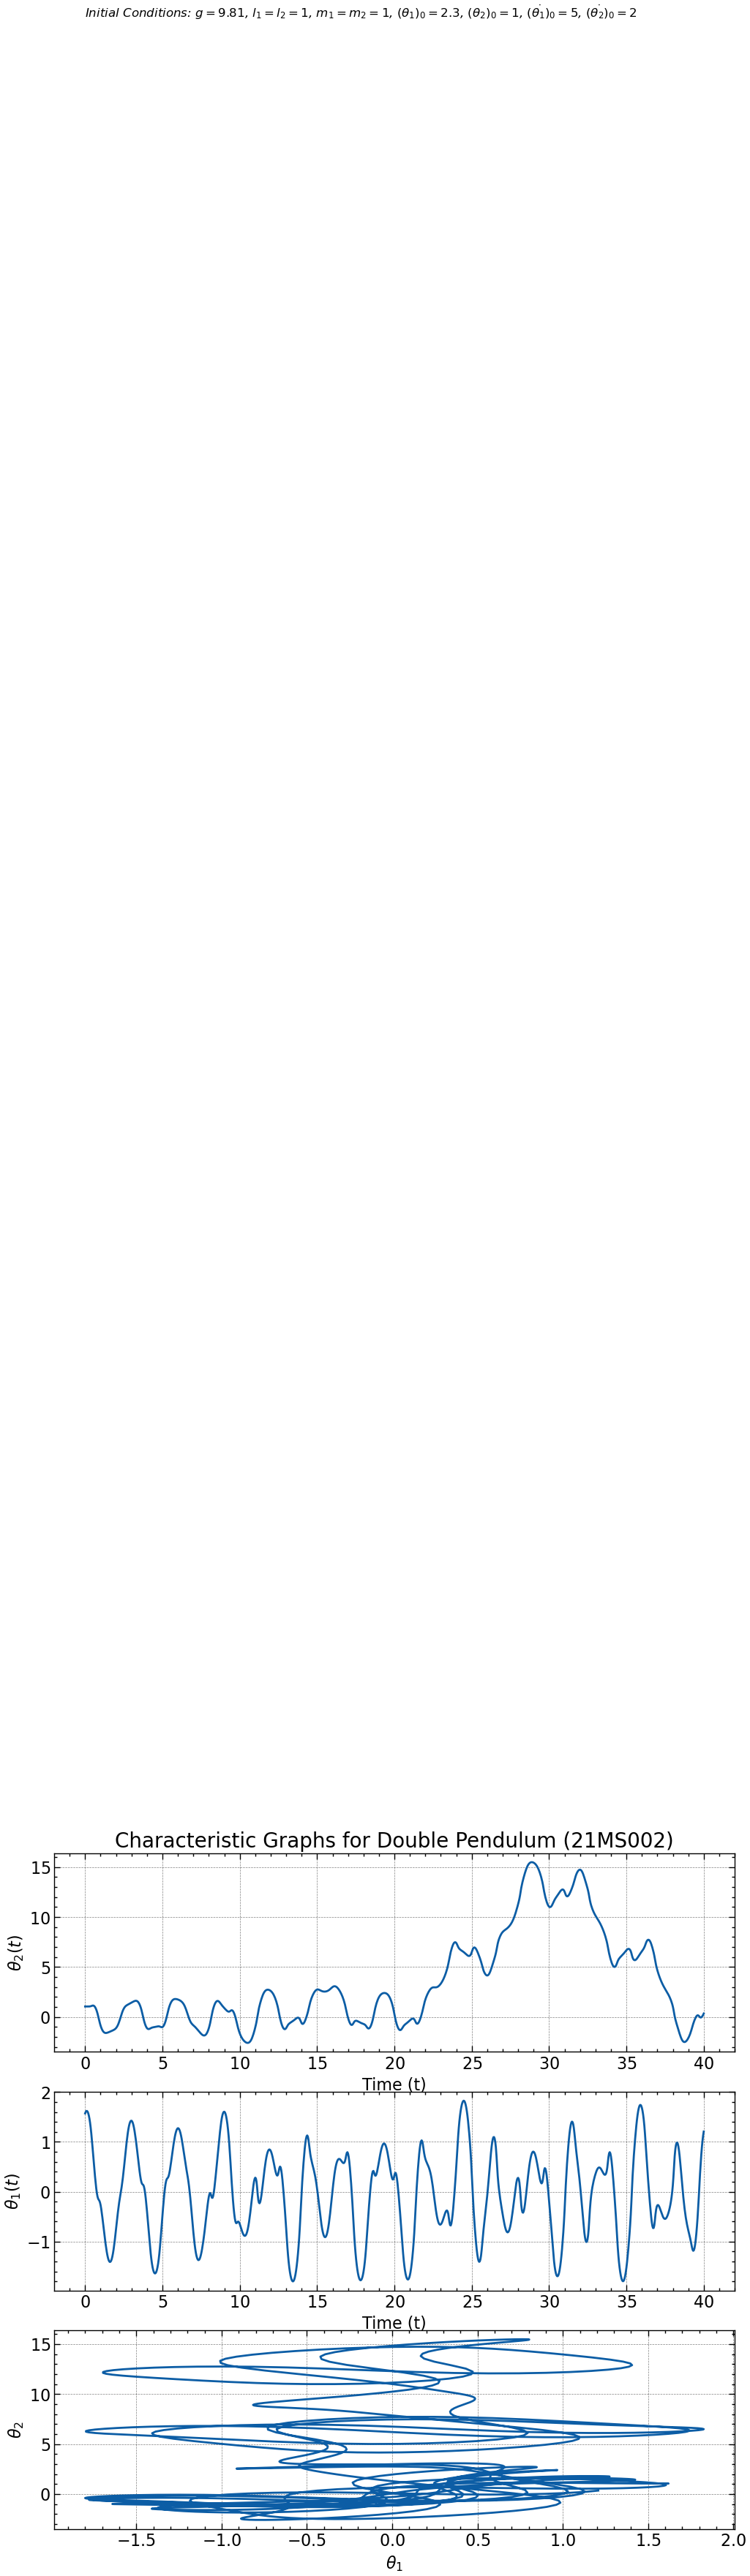

In [51]:
plt.figure(dpi=500)
fig, axes = plt.subplots(3, 1, figsize = (12,12))

ax = axes[0]
ax.set_xlabel(r"Time (t)")
ax.set_ylabel(r"$\theta_2(t)$")
ax.set_title('Characteristic Graphs for Double Pendulum (21MS002)', size=20)
ax.text(0, 200, r'Initial Conditions: $g = 9.81$, $l_1 = l_2 = 1$, $m_1 = m_2 = 1$, $(\theta_1)_0 = 2.3$, $(\theta_2)_0 = 1$, $(\dot{\theta_1})_0 = 5$, $(\dot{\theta_2})_0 = 2$', size=12, style='italic')
ax.plot(t, theta2)

ax1 = axes[1]
ax1.set_xlabel(r"Time (t)")
ax1.set_ylabel(r"$\theta_1(t)$")
ax1.plot(t, theta1)

ax2 = axes[2]
ax2.set_xlabel(r"$\theta_1$")
ax2.set_ylabel(r"$\theta_2$")
ax2.plot(theta1, theta2)

fig.tight_layout()

fig.savefig("Double_Pendulum.pdf", format='pdf')

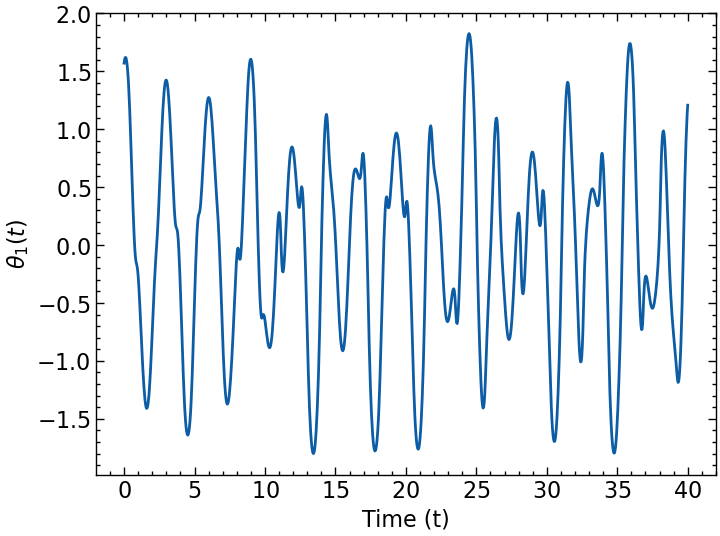

In [52]:
plt.xlabel(r"Time (t)")
plt.ylabel(r"$\theta_1(t)$")
plt.grid()
plt.plot(t, theta1)

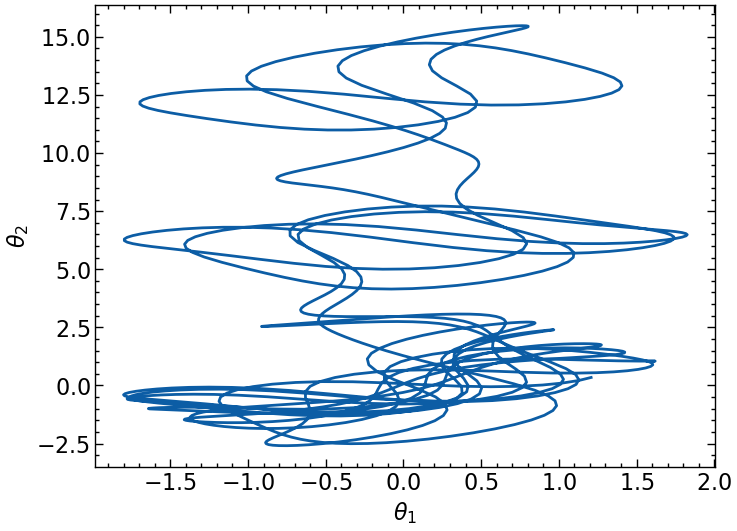

In [53]:
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.grid()
plt.plot(theta1, theta2)

Here's a function that takes in $\theta_1$ and $\theta_2$ and returns the location (x,y) of the two masses.

In [54]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, res.T[0], res.T[2], L1, L2)

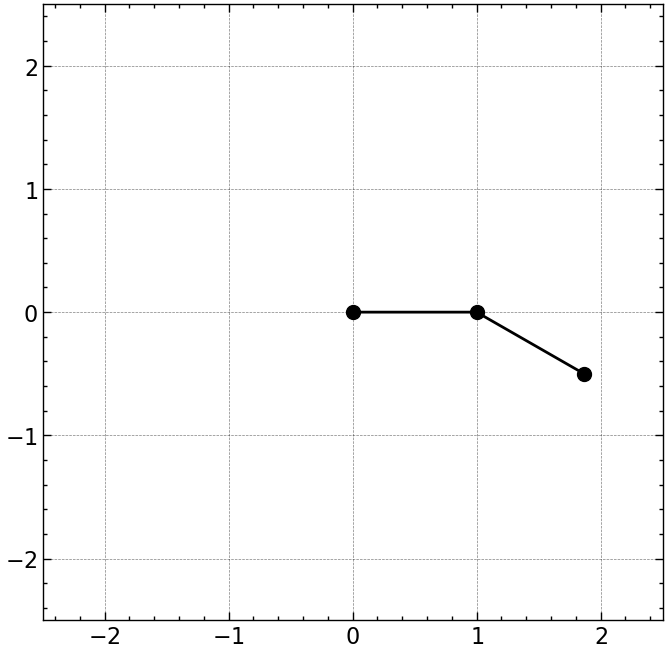

In [55]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('white')
#ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
#ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ko-', lw=2, markersize=10)
ax.set_ylim(-2.5,2.5)
ax.set_xlim(-2.5,2.5)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('double_pendulum.gif',writer='pillow',fps=25)

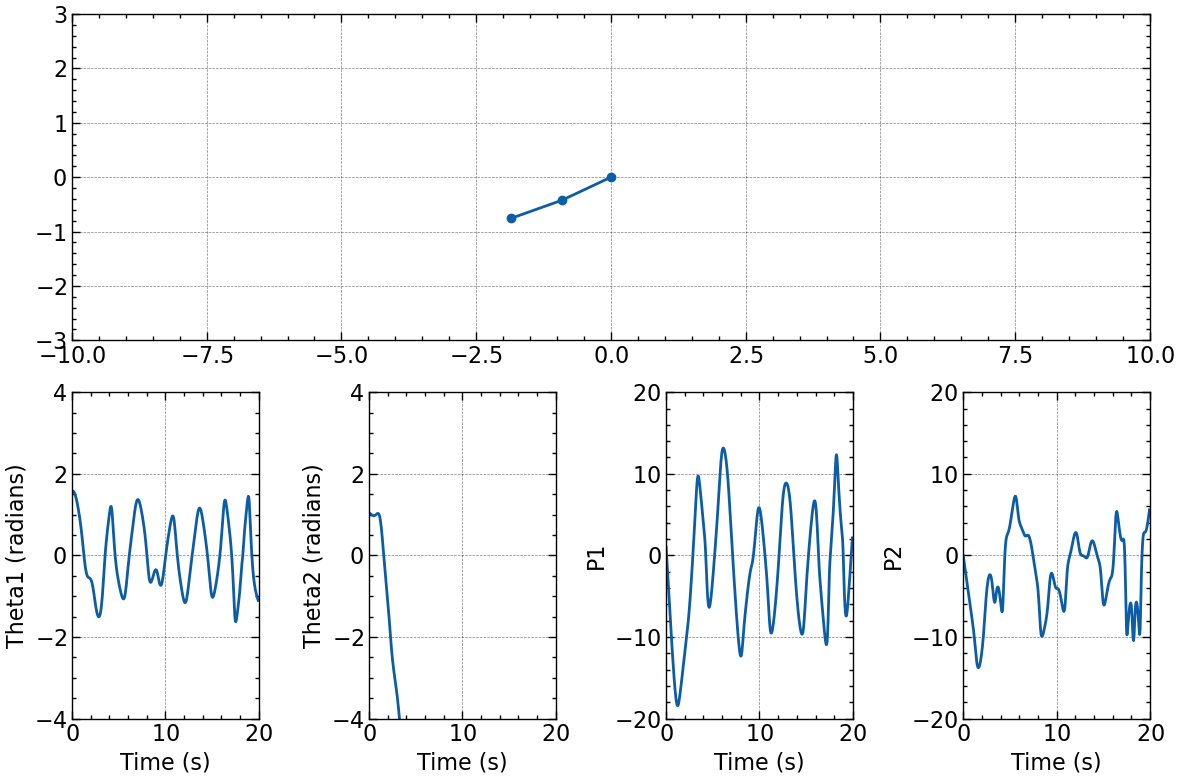

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
l1 = 1.0  # Length of the first pendulum arm (m)
l2 = 1.0  # Length of the second pendulum arm (m)
m1 = 1.0  # Mass of the first pendulum bob (kg)
m2 = 1.0  # Mass of the second pendulum bob (kg)

# Hamiltonian equations for double pendulum
def hamiltonian_equations(t, y):
    theta1, p1, theta2, p2 = y
    
    a = m1 * l1**2 + m2 * (l1**2 + l2**2 + 2 * l1 * l2 * np.cos(theta1 - theta2))
    theta1_dot = (l2 * p1 - l1 * p2 * np.cos(theta1 - theta2)) / a
    theta2_dot = (l1 * (m1 + m2) * p2 - l2 * m2 * p1 * np.cos(theta1 - theta2)) / (l2 * a)
    
    p1_dot = -(m1 + m2) * g * l1 * np.sin(theta1) - (theta1_dot * theta2_dot * m2 * l1 * l2 * np.sin(theta1 - theta2))
    p2_dot = -m2 * g * l2 * np.sin(theta2) + (theta1_dot * theta2_dot * (m1 + m2) * l1 * l2 * np.sin(theta1 - theta2))
    
    return [theta1_dot, p1_dot, theta2_dot, p2_dot]

# Runge-Kutta 4th order integration
def rk4(y, t, dt, derivs_func):
    k1 = dt * np.array(derivs_func(t, y))
    k2 = dt * np.array(derivs_func(t + 0.5*dt, y + 0.5*k1))
    k3 = dt * np.array(derivs_func(t + 0.5*dt, y + 0.5*k2))
    k4 = dt * np.array(derivs_func(t + dt, y + k3))
    
    y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return y_next

# Initial conditions
theta1_0 = np.pi / 2.0
p1_0 = 1.0
theta2_0 = np.pi / 3.0
p2_0 = 0.0
initial_state = [theta1_0, p1_0, theta2_0, p2_0]

# Time parameters
t_start = 0.0
t_end = 20.0
dt = 0.05

# Number of time steps
num_steps = int((t_end - t_start) / dt)

# Arrays to store the trajectory
trajectory = np.zeros((num_steps, 4))

# Integration loop
current_state = initial_state.copy()
for i in range(num_steps):
    t = t_start + i * dt
    trajectory[i] = current_state
    current_state = rk4(current_state, t, dt, hamiltonian_equations)

# Extracting the angles and times for plotting
theta1_vals = trajectory[:, 0]
p1_vals = trajectory[:, 1]
theta2_vals = trajectory[:, 2]
p2_vals = trajectory[:, 3]
times = np.linspace(t_start, t_end, num_steps)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(12, 8))

# Grid layout: 2x3
# Animation (top)
ax_animation = plt.subplot2grid((2, 4), (0, 0), colspan=4)
ax_animation.set_xlim(-10, 10)
ax_animation.set_ylim(-3, 3)
line, = ax_animation.plot([], [], 'o-', lw=2)

# Subplot 1: Theta1 vs. t (bottom-left)
ax1 = plt.subplot2grid((2, 4), (1, 0))
ax1.set_xlim(t_start, t_end)
ax1.set_ylim(-4, 4)
line1, = ax1.plot([], [], lw=2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Theta1 (radians)')

# Subplot 2: Theta2 vs. t (bottom-center)
ax2 = plt.subplot2grid((2, 4), (1, 1))
ax2.set_xlim(t_start, t_end)
ax2.set_ylim(-4, 4)
line2, = ax2.plot([], [], lw=2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Theta2 (radians)')

# Subplot 3: P1 vs. t (bottom-right)
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax3.set_xlim(t_start, t_end)
ax3.set_ylim(-20, 20)
line3, = ax3.plot([], [], lw=2)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('P1')

ax4 = plt.subplot2grid((2, 4), (1, 3))
ax4.set_xlim(t_start, t_end)
ax4.set_ylim(-20, 20)
line4, = ax4.plot([], [], lw=2)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('P2')

def update(i):
    # Update the pendulum animation
    x1 = l1 * np.sin(theta1_vals[i])
    y1 = -l1 * np.cos(theta1_vals[i])
    x2 = x1 + l2 * np.sin(theta2_vals[i])
    y2 = y1 - l2 * np.cos(theta2_vals[i])
    line.set_data([0, x1, x2], [0, y1, y2])
    
    # Update Theta1 vs. t plot
    line1.set_data(times[:i], theta1_vals[:i])
    
    # Update Theta2 vs. t plot
    line2.set_data(times[:i], theta2_vals[:i])
    
    # Update P1 vs. t plot
    line3.set_data(times[:i], p1_vals[:i])
    line4.set_data(times[:i], p2_vals[:i])
    
    return line, line1, line2, line3, line4

ani = FuncAnimation(fig, update, frames=num_steps, blit=True)
ani.save("dp.gif", writer='ffmpeg', fps=20.0)
plt.tight_layout()
plt.show()

<Figure size 4000x3000 with 0 Axes>

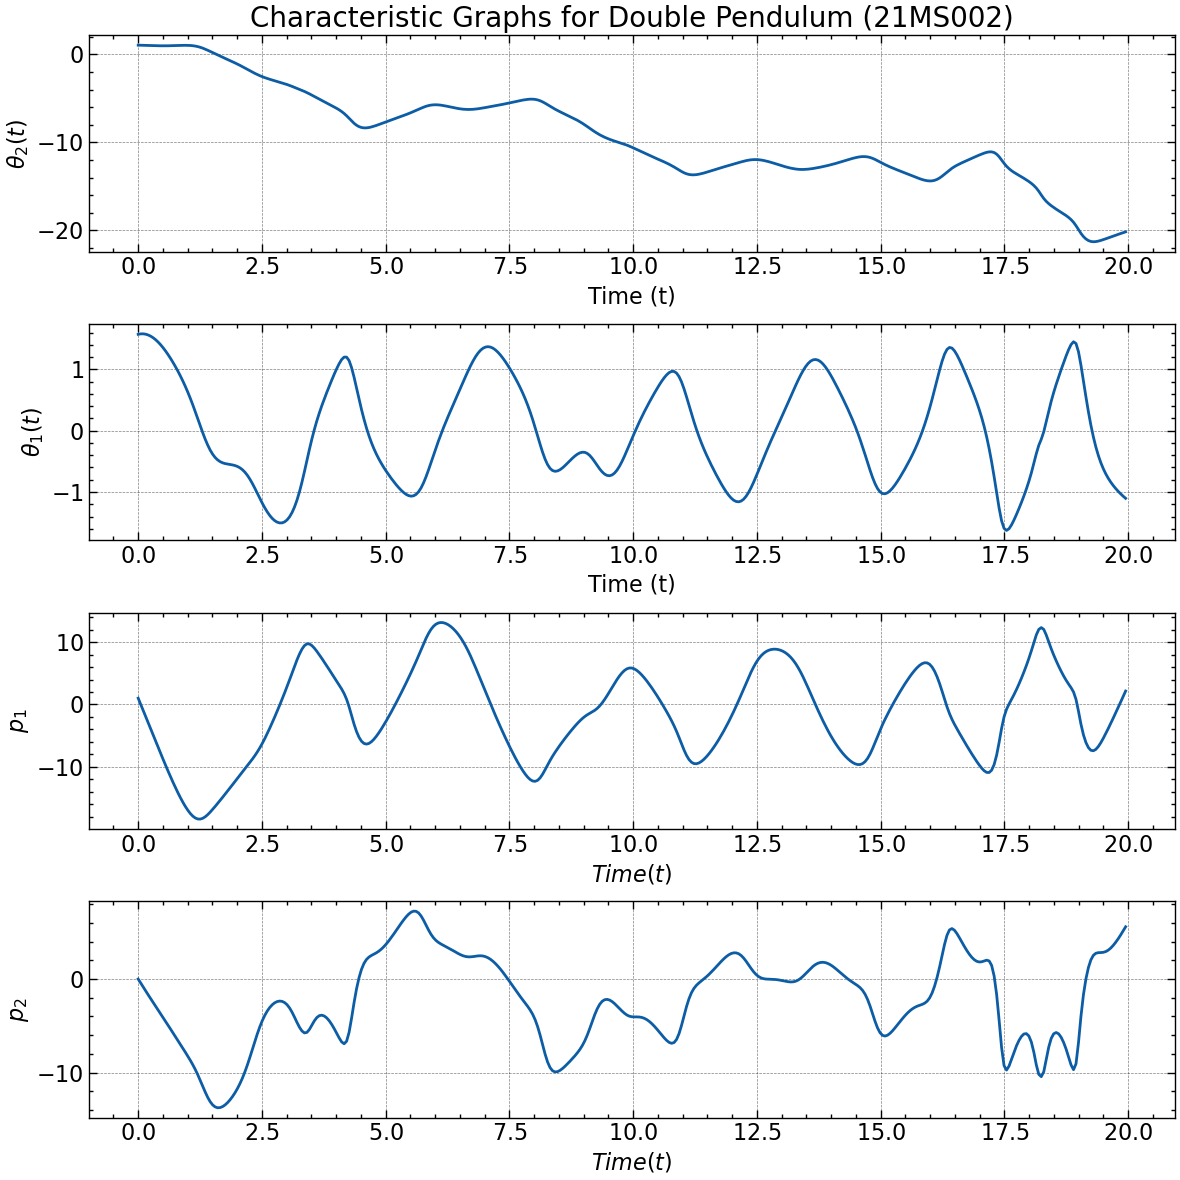

In [10]:
plt.figure(dpi=500)
fig, axes = plt.subplots(4, 1, figsize = (12,12))

ax = axes[0]
ax.set_xlabel(r"Time (t)")
ax.set_ylabel(r"$\theta_2(t)$")
ax.set_title('Characteristic Graphs for Double Pendulum (21MS002)', size=20)
#ax.text(0, 200, r'Initial Conditions: $g = 9.81$, $l_1 = l_2 = 1$, $m_1 = m_2 = 1$, $(\theta_1)_0 = 2.3$, $(\theta_2)_0 = 1$, $(\dot{\theta_1})_0 = 5$, $(\dot{\theta_2})_0 = 2$', size=12, style='italic')
ax.plot(times[:i], theta2_vals[:i])

ax1 = axes[1]
ax1.set_xlabel(r"Time (t)")
ax1.set_ylabel(r"$\theta_1(t)$")
ax1.plot(times[:i], theta1_vals[:i])

ax2 = axes[2]
ax2.set_ylabel(r"$p_1$")
ax2.set_xlabel(r"$Time (t)$")
ax2.plot(times[:i], p1_vals[:i])

ax3 = axes[3]
ax3.set_ylabel(r"$p_2$")
ax3.set_xlabel(r"$Time (t)$")
ax3.plot(times[:i], p2_vals[:i])

fig.tight_layout()

fig.savefig("Double_Pendulum_1.pdf", format='pdf')

<Figure size 4000x3000 with 0 Axes>

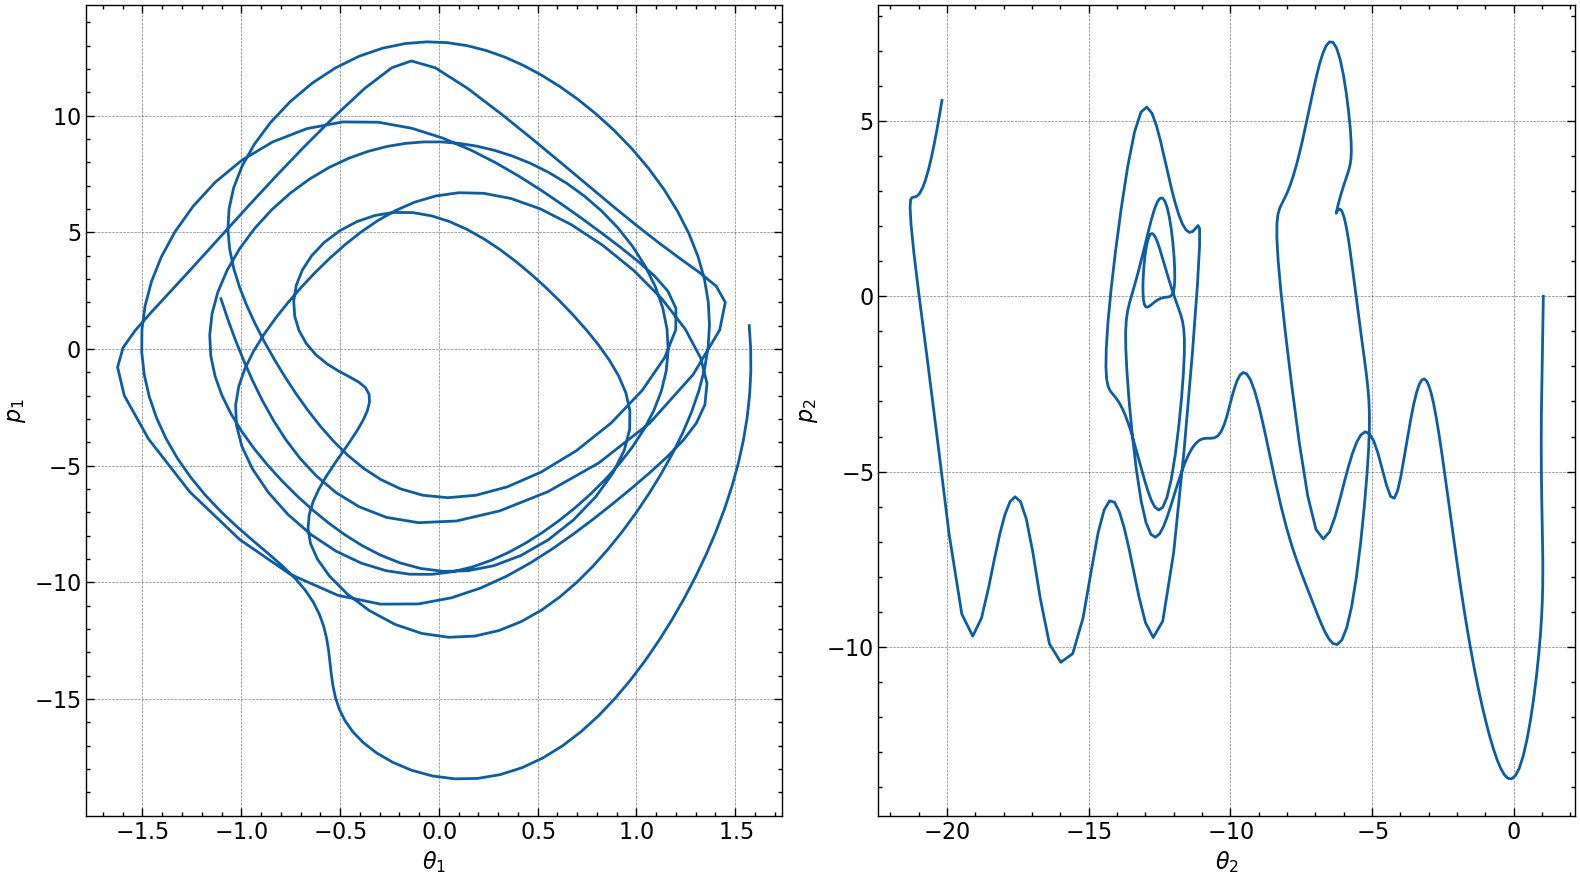

In [11]:
plt.figure(dpi=500)
fig, axes = plt.subplots(1, 2, figsize = (16,9))

ax = axes[0]
ax.set_ylabel(r"$p_1$")
ax.set_xlabel(r"$\theta_1$")
ax.plot(theta1_vals[:i], p1_vals[:i])

ax1 = axes[1]
ax1.set_ylabel(r"$p_2$")
ax1.set_xlabel(r"$\theta_2$")
ax1.plot(theta2_vals[:i], p2_vals[:i])

fig.tight_layout()
fig.savefig("Double_Pendulum_2.pdf", format='pdf')